In [29]:
import requests 
import pandas
import numpy
from datetime import date
from datetime import timedelta
pandas.options.display.float_format = '{:.2f}'.format

# Dans le fichier, le nombre affiché à chaque jour est le nouveau nombre de cas (ou de décès) par région. 
# À partir du 22 janvier 2020 

# Lien pour les CAS (url) : https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

# Lien pour les RÉTABLISSEMENTS (url2) : https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

# Lien pour les DÉCÈS (url3) : https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

In [30]:
# Variable pour avoir automatiquement la dernière colonne du tableau, soit la dernière journée. 
today = date.today()
hier = today - timedelta (days = 1)
hier = hier.strftime("%#m/%#d/%y")

In [31]:
# Ajout d'un code d'erreur pour voir si le lien fonctionne avant de procéder au code.
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

try:
    r = requests.get(url)

except requests.exceptions.RequestException as erreur:
    print("Erreur de connexion à l'adresse web suivante `{0}` : {1}".format(url, erreur))

else:
    print(r.status_code)
    
    if r.status_code >= 200 and r.status_code <= 299:
        print("Résultat valide.")
    # Ajout d'erreur pour le serveur, car parfois le serveur de Github ne fonctionne pas.
    elif r.status_code >= 500 and r.status_code <= 599:
        print("Résultat invalide. Erreur dans le serveur, veuillez réessayer plus tard.")
    else:
        print("Résultat invalide.")

200
Résultat valide.


In [32]:
# Importer le fichier (datac = données cas confirmés)
rawdatac = pandas.read_csv(url, delimiter=',').fillna('N.D.')

# Remplacer certains noms dans le fichier pour faire le bon joint avec le deuxième fichier plus tard 
datac_replace = rawdatac.replace("US","United States").replace("Iran","Iran, Islamic Rep.")

# Faire la somme de cas par pays (et non pas par région)
datac_group = datac_replace.groupby(["Country/Region"])[[hier]].sum()

# Nouveau tableau
datac_new = datac_group.reset_index()
datac_new

,Country/Region,4/6/20
0,Afghanistan,367
1,Albania,377
2,Algeria,1423
3,Andorra,525
4,Angola,16
...,...,...
179,Vietnam,245
180,West Bank and Gaza,254
181,Western Sahara,4
182,Zambia,39


In [39]:
# Importer le fichier csv de la World Bank (Pop = population).
data_air = pandas.read_csv('Data_Air.csv', sep=';').fillna('N.D.')

# Changer les données afin de pouvoir les mettre en ordre décroissant
data_air['2017'] = pandas.to_numeric(data_air['2017'], errors='coerce')
data_air['2017'] = data_air['2017'].apply(numpy.ceil)

# Faire le joint entre les deux fichiers selon le pays et ensuite trier le fichier selon la date
datac_full = data_air.join(datac_new.set_index('Country/Region'), on='Country/Region')
datac_full_iloc = datac_full.iloc[:,[0,-2,-1]]
datac_values = datac_full_iloc.sort_values(by=[hier], ascending=False).head(10)
datac_final = datac_values.sort_values(by=['2017'])
datac_final

,Country/Region,2017,4/6/20
206,United States,8.00,366667.00
179,Spain,10.00,136675.00
205,United Kingdom,11.00,52279.00
188,Switzerland,11.00,21657.00
73,Germany,12.00,103374.00
68,France,12.00,98963.00
96,Italy,17.00,132547.00
91,"Iran, Islamic Rep.",39.00,60500.00
198,Turkey,45.00,30217.00
41,China,53.00,82665.00


Text(0, 0.5, 'Nb. de cas confirmés')

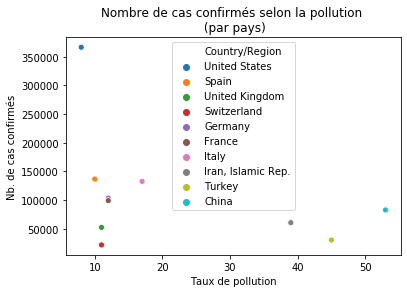

In [40]:
# Importer ce qui est nécessaire pour faire le graphique
import seaborn 
import matplotlib.pyplot

# y = 2017, car c'est l'année la plus récente où nous avons le taux de pollution de chaque pays du top 10. 
seaborn.scatterplot(x='2017', y=hier, hue='Country/Region', data= datac_final)
matplotlib.pyplot.title("Nombre de cas confirmés selon la pollution \n (par pays)")
matplotlib.pyplot.xlabel("Taux de pollution")
matplotlib.pyplot.ylabel("Nb. de cas confirmés")